<a href="https://colab.research.google.com/github/J0KERtry/python_repository/blob/main/%E6%9C%80%E8%BF%91%E5%82%8D%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import NearestNeighbors 
import copy

In [ ]:
data = []  # 結果を入れるリスト

with open('data128.txt', 'r', encoding='utf-8') as file:
    for line in file.readlines():  # 行をすべて読み込んで1行ずつfor文で回す
        row = []  # 行のデータを保存するリスト
        toks = line.split(' ')  # 行を半角スペースで分割する
        for tok in toks:  # 分割したトークン列を回す
            try:
                num = int(tok)  # 整数に変換
            except ValueError:
                continue  # スキップ
            row.append(num)  # 行に保存
        data.append(row)  # 行をnumsに保存
print(data)  

[[2865, 3254], [951, 3716], [3341, 3170], [1619, 2896], [617, 2958], [2927, 3068], [1925, 3386], [3403, 1992], [1921, 2630], [3783, 2676], [541, 1650], [1155, 2080], [1689, 3870], [2847, 3948], [1813, 3658], [1499, 3800], [1521, 3286], [3799, 2660], [2605, 3938], [3731, 1296], [2185, 910], [1647, 3324], [1541, 1978], [1771, 2952], [3105, 38], [2375, 2996], [349, 3666], [1731, 1440], [3577, 3326], [63, 1324], [3765, 3562], [603, 600], [2993, 1366], [1271, 3204], [3021, 2018], [2323, 3632], [1257, 3278], [2895, 508], [3781, 1242], [139, 3304], [1633, 1670], [1287, 3476], [1661, 2802], [1763, 288], [3897, 318], [2847, 588], [1717, 778], [475, 2104], [2385, 2806], [343, 1636], [3885, 1410], [3123, 1840], [2825, 3406], [1423, 92], [2373, 3930], [555, 3240], [1473, 2694], [3783, 212], [2781, 1650], [3, 2752], [3033, 926], [767, 3788], [1525, 3530], [2363, 1816], [177, 2038], [3863, 452], [1805, 706], [2259, 240], [1961, 3758], [207, 1052], [709, 442], [2763, 1576], [1377, 3750], [999, 1748],

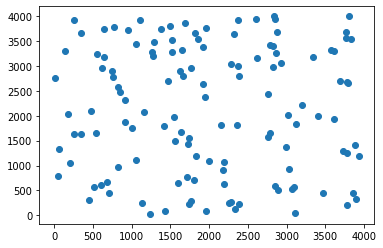

In [ ]:
x, y = zip(*data)
plt.scatter(x, y)
plt.show()

In [ ]:
nn = NearestNeighbors(n_neighbors=2)

def nn_tsp(find_data, ref_number): # 引数はdataと始点とする要素番号
  result_list = []  # 経路順を格納
  distance_sum = 0  # 経路長

  for i in range(0, 127):
    nn_model = nn.fit(find_data) # 学習
    distances, near_index = nn_model.kneighbors([find_data[ref_number]]) # 指定した始点から最も近い点の距離と要素番号を返す

    print(near_index)
    print(distances)
    distance_sum += distances[0][1] # 経路長を加える
    remove_index = near_index[0][0] # 最も近い点(= 自身)の要素番号を取り出す準備
    result_list.append(find_data[remove_index]) # 自身をresult_listに格納
    del find_data[remove_index]   # 始点を削除
    ref_number = near_index[0][1] - 1 # 次に比較の起点とする要素番号を更新

  return distance_sum, result_list

In [ ]:
min_d = 100000

for i in range(0, len(data)):
  find_data = copy.copy(data)
  comp, list = nn_tsp(find_data, i)
  if(comp < min_d):
    min_d = comp
    result_list = copy.copy(list)
    num = i

print(min_d)
print(num)

ストリーミング出力は最後の 5000 行に切り捨てられました。
[[42 76]]
[[  0.         316.94794525]]
[[75 48]]
[[  0.         512.78845541]]
[[47 18]]
[[  0. 128.]]
[[17 48]]
[[  0.         118.82760622]]
[[47 24]]
[[  0.         158.39191899]]
[[23 16]]
[[  0.        418.5020908]]
[[15 62]]
[[  0.         105.10946675]]
[[61 26]]
[[  0.        252.2855525]]
[[25 37]]
[[  0.         305.22123124]]
[[36 71]]
[[  0.         407.92156109]]
[[70 26]]
[[ 0.         86.02325267]]
[[25 39]]
[[  0.         420.47592083]]
[[38  0]]
[[  0.         263.69679558]]
[[73 49]]
[[ 0.         52.15361924]]
[[48 22]]
[[  0.         182.77855454]]
[[21 10]]
[[ 0.         73.59347797]]
[[9 8]]
[[  0.         202.48456731]]
[[ 7 23]]
[[  0.         198.49433241]]
[[22 34]]
[[  0.         665.49229898]]
[[33 43]]
[[  0.        414.3428532]]
[[42 10]]
[[  0.         226.92730113]]
[[ 9 65]]
[[  0.         156.46085772]]
[[64 35]]
[[  0.         201.43485299]]
[[34 14]]
[[  0.         101.19288513]]
[[13 45]]
[[ 0.         67.23094526]]


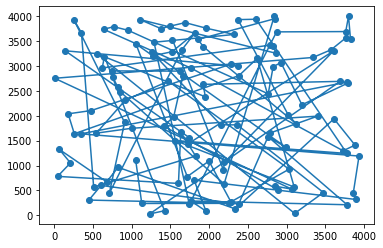

In [ ]:
x, y = zip(*result_list)

plt.plot(x, y) # 点列(x,y)を黒線で繋いだプロット
plt.scatter(x, y)
plt.show() # プロットを表示